# Changes in 2016.03 Release: New Reaction Features

This is the first of a series of posts highlighting changes (mostly new features) in the 2016.03 (Q1 2016) release of the RDKit.

This one focuses on some new capabilities in the chemical reaction handling code.

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit import rdBase
print(rdBase.rdkitVersion)
import time
print(time.asctime())

2016.03.1.b1
Thu Apr  7 13:23:54 2016


Let's start with the Pictet-Spengler reaction from Markus Hartenfeller's collection. The reaction itself has some interesting features, plus the name is fun. ;-)

Here's the reference:
M. Hartenfeller et al; "A Collection of Robust Organic Synthesis Reactions for In Silico Molecule Design" J. Chem. Inf. Model. **51**:3093-8 (2011) 


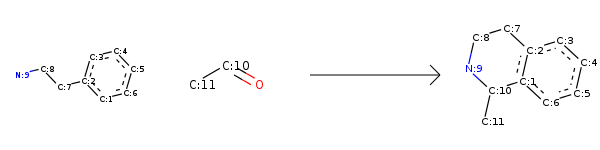

In [2]:
rxn = AllChem.ReactionFromSmarts('[cH1:1]1:[c:2](-[CH2:7]-[CH2:8]-[NH2:9]):[c:3]:[c:4]:[c:5]:[c:6]:1.'
                                 '[#6:11]-[CH1;R0:10]=[OD1]>>'
                                 '[c:1]12:[c:2](-[CH2:7]-[CH2:8]-[NH1:9]-[C:10]-2(-[#6:11])):[c:3]:[c:4]:[c:5]:[c:6]:1	')
rxn

And now a basic set of reactants

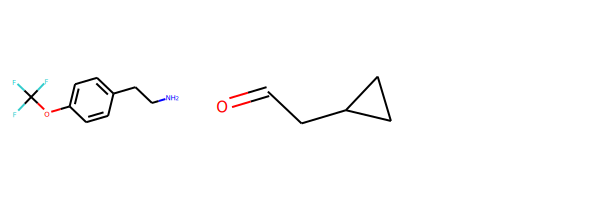

In [3]:
reactants = [Chem.MolFromSmiles(x) for x in ('c1cc(OC(F)(F)F)ccc1CCN','C1CC1CC=O')]
Draw.MolsToGridImage(reactants)

*Aside:* Being able to get SVG output from `Draw.MolsToGridImage()` is another new feature in the 2016.03.1 release.

And the products:

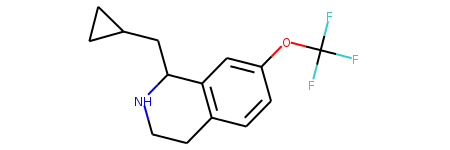

In [4]:
ps = rxn.RunReactants(reactants)
ps[0][0]

Ok, those were the basics that have been around for a while.

One of the new additions is `ChemicalReaction.RunReactant()`, this carries out whatever manipulations are required to process just one of the reaction's reactants and add it to the products:

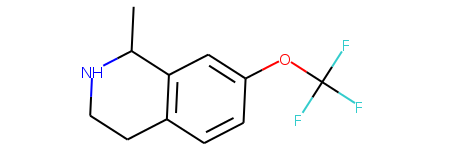

In [5]:
p0s = rxn.RunReactant(reactants[0],0)
p0s[0][0]

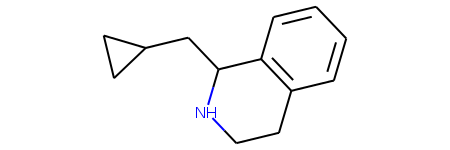

In [6]:
p1s = rxn.RunReactant(reactants[1],1)
p1s[0][0]

The molecules resulting from `ChemicalReaction.RunReactant()` carry some additional information that allow them to be reduced to just the part that is added to the product. This can be accessed with the function `ReduceProductToSideChains()`, which can either add a dummy to show where the attachment occurs:

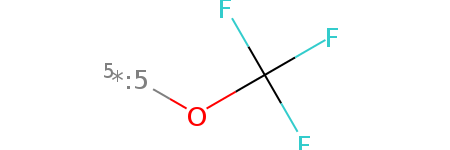

In [7]:
AllChem.ReduceProductToSideChains(p0s[0][0],addDummyAtoms=True)

Or leave it out:

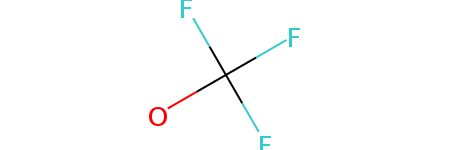

In [8]:
AllChem.ReduceProductToSideChains(p0s[0][0],addDummyAtoms=False)

Here's the same thing for the second reactant:

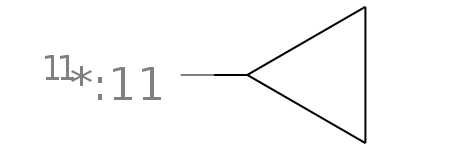

In [9]:
AllChem.ReduceProductToSideChains(p1s[0][0],addDummyAtoms=True)

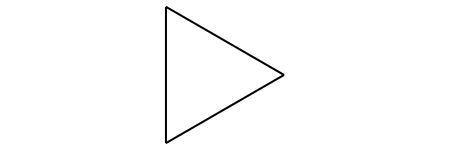

In [10]:
AllChem.ReduceProductToSideChains(p1s[0][0],addDummyAtoms=False)

You can also apply this function to the products of the full reaction:

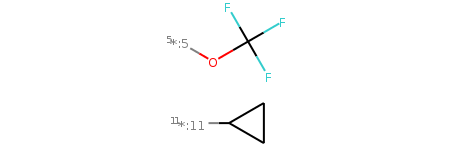

In [11]:
AllChem.ReduceProductToSideChains(ps[0][0],addDummyAtoms=True)

Let's look at another ring-forming reaction, the Friedlaender reaction:

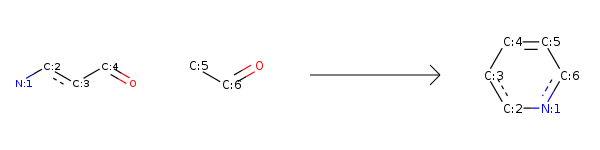

In [12]:
f_rxn = AllChem.ReactionFromSmarts('[NH2;$(N-c1ccccc1):1]-[c:2]:[c:3]-[CH1:4]=[OD1].'
                                    '[C;$(C([#6])[#6]):6](=[OD1])-[CH2;$(C([#6])[#6]);!$(C(C=O)C=O):5]>>'
                                    '[N:1]1-[c:2]:[c:3]-[C:4]=[C:5]-[C:6]:1')
f_rxn

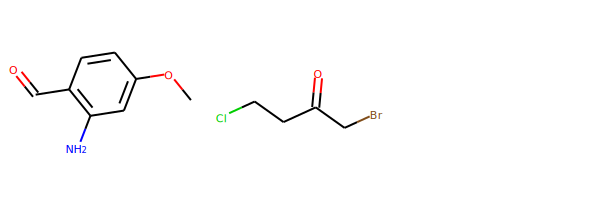

In [13]:
f_reactants = [Chem.MolFromSmiles(x) for x in ['Nc1c(C=O)ccc(OC)c1','ClCCC(=O)CBr']]
Draw.MolsToGridImage(f_reactants)

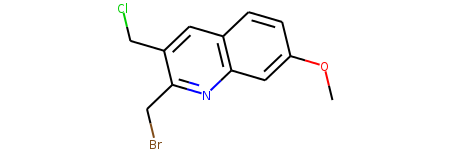

In [14]:
ps = f_rxn.RunReactants(f_reactants)
ps[0][0]

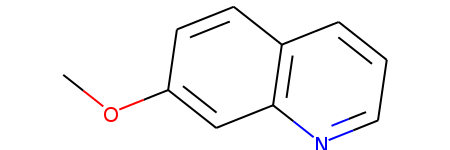

In [15]:
p0s = f_rxn.RunReactant(f_reactants[0],0)
p0s[0][0]

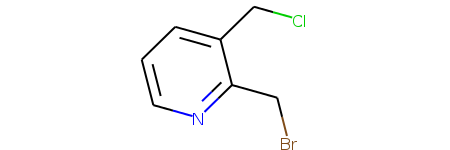

In [16]:
p1s = f_rxn.RunReactant(f_reactants[1],1)
p1s[0][0]

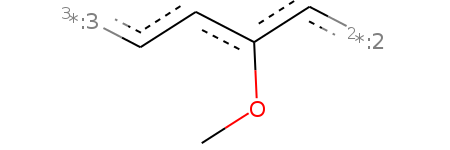

In [17]:
AllChem.ReduceProductToSideChains(p0s[0][0],addDummyAtoms=True)

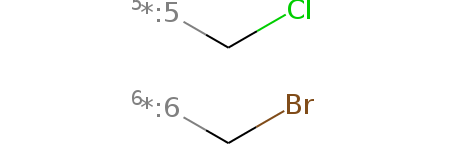

In [18]:
AllChem.ReduceProductToSideChains(p1s[0][0],addDummyAtoms=True)

And the full product:

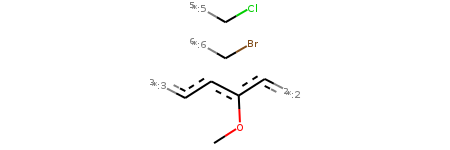

In [19]:
AllChem.ReduceProductToSideChains(ps[0][0],addDummyAtoms=True)

This points to an oddity (of sorts) in the reaction definition. The reaction SMARTS requires a primary N connected to a six-membered aromatic carbocycle, but all of the atoms from that carbocycle are not mapped. There's nothing per-se wrong with this, but it's not especially compatible with the idea of sidechains that we're using here.

We can rewrite the reaction SMARTS and produce something equivalent that's a bit more intuitive in this analysis:

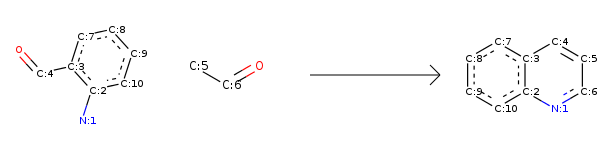

In [20]:
f_rxn2 = AllChem.ReactionFromSmarts('[NH2:1]-[c:2]1:[c:3](-[CH1:4]=[OD1])[c:7][c:8][c:9][c:10]1.'
                                    '[C;$(C([#6])[#6]):6](=[OD1])-[CH2;$(C([#6])[#6]);!$(C(C=O)C=O):5]>>'
                                    '[N:1]1-[c:2]2:[c:3](-[C:4]=[C:5]-[C:6]:1)[c:7][c:8][c:9][c:10]2')
f_rxn2

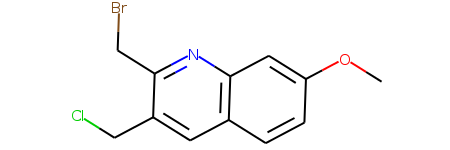

In [21]:
ps = f_rxn2.RunReactants(f_reactants)
ps[0][0]

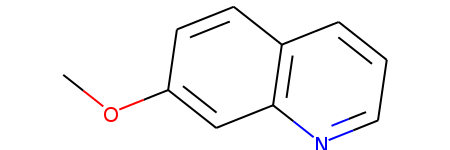

In [22]:
p0s = f_rxn2.RunReactant(f_reactants[0],0)
p0s[0][0]

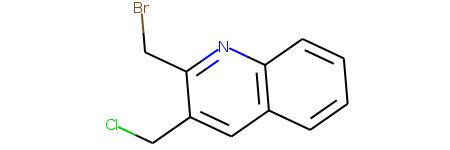

In [23]:
p1s = f_rxn2.RunReactant(f_reactants[1],1)
p1s[0][0]

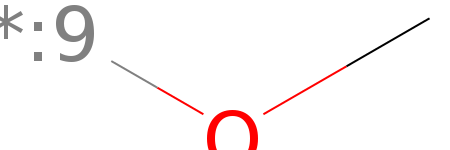

In [24]:
AllChem.ReduceProductToSideChains(p0s[0][0],addDummyAtoms=True)

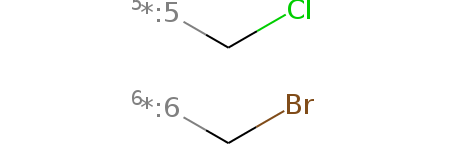

In [25]:
AllChem.ReduceProductToSideChains(p1s[0][0],addDummyAtoms=True)

That's a less surprising result